# Integración por Taylor

Aquí veremos un ejemplo sencillo de cómo integrar usando el método de Tayor en un problema de valor inicial, o sea, para una ecuación diferencial ordinaria con una condición inicial.

El punto de partida, y *absolutamente importante* en todo lo que sigue, es el [Teorema Fundamental de las Ecuaciones Diferenciales Ordinarias](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem), (o teorema de existencia y unicidad de las EDOs):

#### Teorema

Consideren el problema de valores iniciales $y'(t)=f(t,y(t)),\ y(t_0)=y_0$. Suponemos que $f(t,y)$ es Lipschitz uniformemente continua en $y$ (lo que significa que hay una constante, independiente de $t$, que acota $f$ para todo intervalo de su dominio) y continua en $t$. Entonces, para algún valor $\varepsilon > 0$ existe una solución única $y(t)$ al problema de valor inicial en el intervalo $[t_0-\varepsilon, t_0+\varepsilon]$.

**Importante:** El teorema establece la existencia y unicidad de la solución en un intervalo de $t$ en torno al valor $t_0$ que especifica la condición inicial. Esto, sin embargo, **no** implica que la solución exista para todo tiempo $t>t_0$.

## Un ejemplo sencillo

El método de Taylor lo describiremos a través de un ejemplo. Concretamente, ilustraremos como integrar la ecuación diferencial

\begin{equation}
\dot{x} = f(x) = x^2,
\end{equation}

con $x(0) = 3$.

Antes de describir el método, vale la pena notar que esta ecuación la podemos resolver analíticamente. La solución, como se puede comprobar rápidamente es

\begin{equation}
x(t) = \frac{3}{1-3t}.
\end{equation}

Esta solución muestra que $x(t)\to\infty$ cuando $t\to 1/3$; esto es un ejemplo de que la solución $x(t)$ **no existe** para $t>1/3$. 


El punto importante de este comentario es que, sin importar el método de integración, si hiciéramos una integración "larga" usando un *paso de integración constante* (o sea, a partir de $x(t_k)$ obtenemos $x(t_{k+1})$, con $t_{k+1} = t_0 + (k+1)\delta t = t_k + \delta t$), el método continuará la integración más allá de $t=1/3$, que es hasta donde tiene sentido la solución, a menos de que tengamos la buena fortuna de caer exactamente en $t_n=1$. Esto es una *advertencia* de que uno debe ser extremandamente cuidadoso si considera pasos de integración constantes. 

Sin embargo, si tenemos un método de integración con paso adaptativo, hay esperanza de que este problema no ocurra.


La idea del método de Taylor es construir una solución (local en $t$) que aproxime muy bien la solución de la ecuación diferencial en alguna vecindad del punto inicial $t_0$. En particular, escribimos el polinomios (en torno a $t_0$), esto es

\begin{equation}
x(t) = \sum_{k=0}^\infty x_{[k]}(t_0)\, (t-t_0)^k,
\end{equation}

donde $x_{[k]}(t_0)$ es el coeficiente de Taylor de orden $k$. Esta solución cumple la condición inicial imponiendo $x_{[0]}(t_0) = x_0$. 
Excepto por $x_{[0]}(t_0)$, el resto de los coeficientes del desarrollo son por determinar, cosa que haremos iterativamente. 

Empezaremos considerando que $p$ es infinito, o sea, construiremos la solución analítica; después entraremos en las sutilezas de tener aproximaciones de orden finito.

### Solución a primer orden

Escribimos, como aproximación de primer orden a la solución en la forma $x(t) = x_0 + x{[1]}(t_0)\, (t-t_0) + \mathcal{O}((t-t_0)^2)$, y queremos obtener el valor de $x_{[1]}(t_0)$. De aquí, tenemos que $\dot{x} = x{[1]}+ \mathcal{O}((t-t_0))$, y sustituyendo en ambos lados de la ecuación diferencial obtenemos

\begin{eqnarray}
x{[1]} + \mathcal{O}((t-t_0)) & = & \big[x_0 + x{[1]}(t_0)\, (t-t_0) + \mathcal{O}((t-t_0)^2)\big]^2 \\
& = & x_0^2 + \mathcal{O}((t-t_0)).
\end{eqnarray}

De aquí concluimos que $x_{[1]}=x_0^2$.

Es importante notar que **no** necesitamos hacer el cálculo explícito del cuadrado de todo el polinomio; *únicamente* calculamos (y usamos) el término de orden cero en el lado derecho de la ecuación.

### Solución a segundo orden y órdenes mayores

Para la aproximación a segundo orden escribimos $x(t) = x_0 + x_0^2 (t-t_0) + x{[2]}(t-t_0)^2+\mathcal{O}((t-t_0)^3)$, donde queremos obtener $x_{[2]}(t_0)$. En este caso, la derivada es $\dot{x} = x_0^2 + x_{[2]}(t_0)\,(t-t_0) + \mathcal{O}((t-t_0)^2)$, y sustituyendo nuevamente en la ecuación diferencial obtenemos

\begin{eqnarray}
x_0^2 + 2 x_{[2]}(t_0)\,(t-t_0) + \mathcal{O}((t-t_0)^2) & = & \big[x_0 + x_0^2 (t-t_0) + x{[2]}(t-t_0)^2+\mathcal{O}((t-t_0)^3)\big]^2 \\
& = & x_0^2 + 2 x_0^3 (t-t_0) + \mathcal{O}((t-t_0)^2).
\end{eqnarray}

De aquí obtenemos $x_{[2]}(t_0) = x_0^3$. Nuevamente, vale la pena enfatizar que el lado derecho de la ecuación sólo se calcula a primer orden.

Para órdenes más altos, uno continua de igual manera: $x(t) = x_0 + x_0^2 (t-t_0) + x_0^3 (t-t_0)^2+ x{[3]}(t-t_0)^3+\mathcal{O}((t-t_0)^4)$, y al derivar y substituir $x^2$, se obtiene $x{[3]}(t_0)=x_0^4$. Y así se continua sucesivamente.

Finalmente, se obtiene que

\begin{eqnarray}
x(t) & = & x_0 + x_0^2 (t-t_0) + x_0^3 (t-t_0)^2 + x_0^4 (t-t_0)^3 + \dots \\
     & = & x_0 \big(1 + x_0 (t-t_0) + x_0^2 (t-t_0)^2 + \dots\big) = \frac{x_0}{1-x_0(t-t_0)},\\
\end{eqnarray}

donde $t$ está limitado por $t - t_0 = 1/x_0$. Esto coincide con el resultado analítico que se espera.

Vale la pena notar que, para que la serie converja absolutamente, se requiere que los términos sucesivos satisfagan ($t>t_0$)

\begin{equation}
\Big | \frac{ x_{[n]}(t_0)\, (t-t_0)^n }{x_{[n+1]}(t_0)\, (t-t_0)^{n+1}}\Big| = \frac{1}{|x_0|(t-t_0)} < 1,
\end{equation}

lo que define el radio de convergencia en $t$ de la serie.

## El método de Taylor

### Relaciones de recurrencia de los coeficientes de Taylor

En general, para la ecuación diferencial $\dot{x} = f(x(t))$ con $x_0=x(t_0)$, uno puede demostrar que los coeficientes $x_{[k]}$ están dados por

\begin{equation}
x_{[k]} = \frac{f_{[k-1]}}{k},
\end{equation}

donde los coeficientes $f_{[k']}$ son los coeficientes del desarrollo en serie de Taylor en $t-t_0$ de $f(x(t))$. Esta es una relación de recurrencia para $x_{[k]}$. Es claro que, dado que el lado derecho de la ecuación anterior involucra los coeficientes $f_{[k']}$, uno debe implementar funciones que permitan calcular dichos coeficientes.

### Paso de integración

Claramente, lo descrito más arriba no se puede implementar en la computadora. Es decir, estamos obligados a truncar el polinomio de Taylor en un grado $p$ (finito). Formalmente,  escribimos

\begin{equation}
x(t) = \sum_{k=0}^p x_{[k]}(t_0)\, (t-t_0)^k + \mathcal{R}_p ,
\end{equation}

donde el *residuo* está dado por

\begin{equation}
\mathcal{R}_p = x_{[p+1]}(\xi)\, (t-t_0)^{p+1},
\end{equation}
 y $\xi \in [t_0, t]$.

Queremos, entonces, truncar la serie en un $p$ finito, pero suficientemente grande de tal manera que el residuo sea pequeño.

¿Dónde truncamos? En general esto sólo lo podemos contestar si podemos conocer el residuo (en términos de $p$), cosa que no es sencilla. 

Es por esto que uno *usa* las propiedades de convergencia de la serie de Taylor para $x(t)$, para $p$ *suficientemente* grande. Si $p$ es suficientemente grande, entonces las correcciones sucesivas serán cada vez menores, ya que la serie es convergente. 

En particular, para $p$ suficientemente grande tendremos

\begin{equation}
\big| \, x_{[p]}(t_0)\, (t-t_0)^p \, \big| \leq \epsilon,
\end{equation}

donde $\epsilon$ es una cota, *suficientemente pequeña*, para *todos* los términos sucesivos.

De aquí obtenemos una cota para el paso de integración $h=t-t_0$,

\begin{equation}
h = t-t_0 \leq \Big(\frac{\epsilon}{\big| x_{[p]}(t_0)\big|}\Big)^{1/p}.
\end{equation}

Uno elige $\epsilon$ para que sea mucho menor que el epsilon de la máquina. 

El paso de integración obtenido depende de $t_0$; por lo tanto, al hacer la evolución temporal, distintos pasos de integración se irán calculando, por lo que el paso de integración en general no será constante.

Algo importante que vale la pena hacer notar es que, fijando $h$ de tal manera que se garantiza la convergencia de la serie, la serie de Taylor se aplica a todo valor de $t$ tal que $t_0 \leq t \leq t_0 + h$.

En la práctica, y dado que normalmente uno lidia con ecuaciones de segundo orden, uno considera el menor de los pasos de integración obtenidos a partir de los dos últimos términos de la serie de Taylor.

Es *importante* enfatizar que este procedimiento sólo funciona cuando el orden $p$ es suficientemente grande, de tal manera que estamos entrados en la cola convergente de la serie. 

### Sumando la serie

Una vez que tenemos el paso de integración $h$, queremos sumar la serie para obtener $x(t_1)$ con $t_1 = t_0+h$. Para esto, simplemente debemos sumar la serie

\begin{equation}
x(t_1) = x(t_0+h) = \sum_{k=0}^p x_{[k]}(t_0)\, h^k.
\end{equation}

Numéricamente, la mejor manera de hacer esto es usando [el método de Horner](https://en.wikipedia.org/wiki/Horner%27s_method). El método de Horner consiste en factorizar de manera apropiada el polinomio, el cual sólo se evalúa a través de productos y sumas (¡sin potencias!). Esto permite, por un lado, minimizar el número de operaciones, y en el caso de series de Taylor de orden suficientemente grande para estar en la cola convergente, considerar correctamente los términos pequeños.

Reescribiendo la serie tenemos

\begin{eqnarray}
x(t_1) & = & x_0 + x_{[1]} \, h + \dots + x_{[p-1]} \,h^{p-1} + x_{[p]} \, h^p\\
& = & x_0 + x_{[1]} \, h + \dots + h^{p-1} ( x_{[p-1]} + h x_{[p]} )\\
& = & x_0 + x_{[1]} \, h + \dots + h^{p-2} ( x_{[p-2]} + h ( x_{[p-1]} + h x_{[p]} ) )\\
& = & x_0 + h\big( x_{[1]} + h(... + h ( x_{[p-1]} + h x_{[p]} )...\big).
\end{eqnarray}

Entonces, consideramos primero (para la suma) el término $x_{[p]}$ y $x_{[p]}$, a partir de los cuales construimos $\tilde{x}_{p-1} = x_{[p-1]} + h x_{[p]}$, y usando $\tilde{x}_{p-1}$ obtenemos $\tilde{x}_{p-2} = x_{[p-2]} + h \tilde{x}_{p-1}$, y así sucesivamente hasta tener $\tilde{x}_0=x(t_1)$, que es el resultado buscado.

Una vez que hemos obtenido $x(t_1)$, uno utiliza este valor como la nueva condición inicial, y simplemente se iteran los pasos anteriores hasta obtener $x(t_2)$.

## Tarea 7

**NOTA** El contenido de este ejercicio se incluirá en la "Tarea7.ipynb". Nuevamente, esta tarea deberá ser elaborada en equipos.

### Ejercicio

Usando su implementación de polinomios de Taylor, escriban un integrador para la ecuación diferencial que se desarrolló en este ejemplo, esto es, con la condición inicial $x(0) = 3$. 

El integrador debe hacer las operaciones necesarias para obtener automáticamente los coeficientes $x_{[k]}$, *en cada paso de integración*, a partir de la condición inicial local. Un requisito básico para esto es que tengan una implementación de la función $P_\alpha(x) = [g(x)]^\alpha$ con $g(x)$ un polinomio, que obtuvieron en la "Tarea6", y que funcione bien en particular para `alpha::Int`.

La implementación debe consistir de varias funciones: 

- Una función donde se calculen los coeficientes $x_{[k]}(t_0)$ de la expansión. Esta función deberá llamar a otra donde se implementan las ecuaciones de movimiento.

- Una función donde se obtenga el paso de integración $h$.

- Otra función donde se haga la suma por el método de Horner.

- Finalmente, una función que use las funciones anteriores para hacer la integración desde un tiempo inicial a uno final. En este punto, *fingiremos ignorancia*, en el sentido que el tiempo inicial es cero, y el tiempo final será $0.5$ (que está más allá de donde hay problemas).


Dado que conocemos la solución analítica, den como función de $t$ el error relativo de su integrador (respecto al valor del resultado analítico).

In [4]:
include("Taylor.jl")
using TS

In [2]:
"""
integrador(t0,x0,tf,f,p)

Este es un integrador de una función f de variable real: x'(t) = f(x(t)).
t0 es la variable independiente inicial y x0= x(t0) la condición inicial.
tf es la variable independiente final.
p es el orden de la serie de Taylor que se quiere trabajar. Téngase en cuenta
que los pasos de t están basados en que el error sea menor que la epsilon
de la máquina, así que entre mayor sea p, mayor facilidad tendrá el programa
para encontrar la h.

Devuelve una lista de listas de la forma (t,x).

"""
function integrador(t0::Real, x0::Real, tf::Real, f::Function, p::Int)
    # Inicializamos la lista de respuestas.
    t = [t0]
    xt = [x0]
    
    # Ejecutamos mientras que el tiempo inicial sea menor al final.
    while t0 <= tf
        
        # Empezamos un Taylor con la condición inicial, un solo escalar.
        x = Taylor(x0)
        
        # A continuación se calcular la serie de Taylor hasta orden p
        # usando las relaciones de recurrencia entre f y x.
        for i in range(1,p)
           # En cada paso se vuelve a calcular la serie de Taylor de f(x),
           # cada vez a mayor orden.
           ft = f(x)
           # De ésta se extrae el nuevo coeficiente de x(t) que se anexa.
           x = Taylor(push!(x.taylor_vec,ft.taylor_vec[i]/i))
        end
    
        # Ahora se escoge un paso. Como se recomienda, se toman los dos 
        # últimos términos de la serie para calcular h1 y h2.
        h1 = (1/2)*(eps(1.0)/abs(x.taylor_vec[p+1]))^(1/p)
        h2 = (1/2)*(eps(1.0)/abs(x.taylor_vec[p]))^(1/(p-1))
        # Luego se toma h como el mínimo de las anteriores h1 y h2 y se suma
        # al tiempo.
        h = minimum([h1,h2])
        t0 += h
    
        # Ahora sumamos la serie de acuerdo al método de Horner:
        s = x.taylor_vec[p+1]
        for k in range(1,p)
            s = x.taylor_vec[p+1-k] + h*s
        end
    
        # x0 es ahora la suma de la serie: x(t0+h).
        x0 = s
        
        # Vamos a poner una condición por si la solución diverge.
        if isnan(x0) | (abs(x0) == Inf)
            println("La solución diverge en t = ", t0)
            println("No pude llegar al tiempo final t = ", tf)
            # Que devuelva las listas antes de la divergencia.
            return t, xt
        end
        
    
        # Se anexa a la lista de respuestas.
        push!(t,t0)
        push!(xt,x0)
    
    end
    # Se devuelven las lista.
    return t, xt
end

integrador (generic function with 1 method)

In [3]:
# Ponemos el orden de las series de Taylor como 20.
p = 20

# Las condiciones del problema son:
t0 = 0.0
tf = 0.5
x0 = 3.0

# La función x'(t) = f(x(t))
f(x) = x^2

f (generic function with 1 method)

Ahora corremos el integrador con nuestras condiciones.

In [4]:
t,x = integrador(t0,x0,tf,f,p);

La solución diverge en t = 0.3333333333333201
No pude llegar al tiempo final t = 0.5


Como se puede ver, pese a haber intentado llegar a $t=0.5$, `Julia` se dio cuenta de que la serie diverge y le dijimos que parara. 

A continuación podemos ver el error con respecto a la solución analítica:

In [5]:
xs = similar(x)
xerror = similar(x)
for i in range(1,length(xs))
    xs[i] = 3/(1-3*t[i])
    xerror[i] = abs(x[i]-xs[i])
end

In [10]:
using PyPlot
using PyCall
plt = PyPlot

PyPlot

Ahora graficamos la solución:

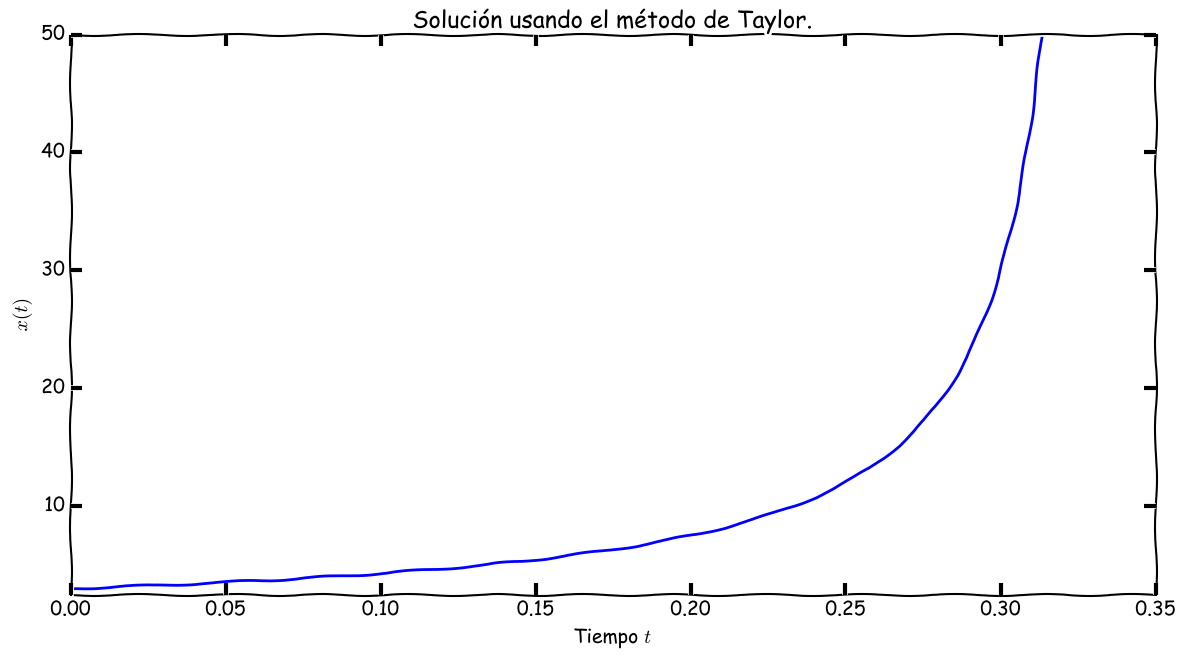

In [7]:
# Everyone loves xkcd!!
plt.xkcd()

fig = figure("taylor_solution", figsize=(14,7))
plt.plot(t,x);
plt.ylabel(L"$x(t)$");
plt.xlabel(L"Tiempo $t$");
plt.title("Solución usando el método de Taylor.");

ax = plt.gca()
ax[:set_ylim]((2.5,50));
show()

También el error absoluto (en logaritmo):

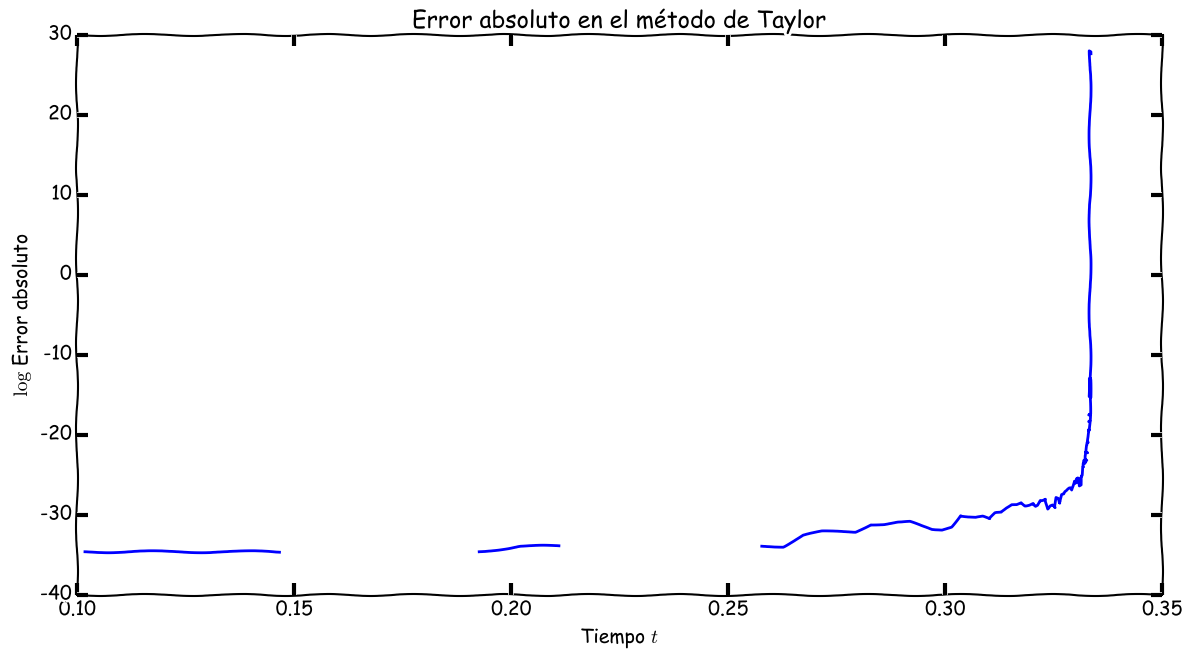

In [8]:
fig2 = figure("error_propag", figsize=(14,7))
plt.plot(t,log(xerror));
plt.ylabel(L"$\log$ Error absoluto");
plt.xlabel(L"Tiempo $t$");
plt.title("Error absoluto en el método de Taylor")
show()

Como puede verse el error sí crece sustancialmente, pero esto es sólo en la vecindad de la singularidad $t=1/3$. En tiempos previos el error es muy pequeño.

### Ejercicio

Repitan los cálculos usando el método de Runge-Kutta de 4o orden con paso de integración fijo (que es lo más sofisticado que conocen hasta ahora) y comparen los resultados del error relativo con el método de Taylor. En particular, finjan ignorancia de la misma manera que en el ejercicio anterior.

In [15]:
"""
runge_kutta(t0,x0,tf,h,f)

Calcula usando el método de Runge-Kutta de 4o. orden la solución a x'(t) = f(t,x(t))
donde f es una función real con entradas t y x(t).
Las condiciones iniciales están dadas por t0,x0=x(t0). El tiempo final es tf
y el paso fijo es h.
Devuelve una tupla de listas t,x con la solución.
"""
function runge_kutta(t0::Real, x0::Real, tf::Real, h::Real, f::Function)
    # Inicializamos las listas de respuesta.
    t = [t0]
    x = [x0]
    # Continuamos mientras que que el último tiempo sea menor al tiempo de paro.
    while t[end]<=tf
        # Se resuelve como se resuelve típicamente Runge-Kutta.
        k1 = f(t[end], x[end])
        k2 = f(t[end]+h/2, x[end]+h*k1/2)
        k3 = f(t[end]+h/2, x[end]+h*k2/2)
        k4 = f(t[end]+h, x[end]+h*k3)
        # Este es el nuevo x(t)
        y = x[end]+(k1+2*k2+2*k3+k4)*h/6
        # Para tener un "control" sobre la divergencia ponemos este if sobre y.
        if (abs(y) == Inf) | (isnan(y))
            println("La solución diverge en t = ", t[end])
            println("No pude llegar al tiempo final t = ", tf)
            return t,x
        end
        # Aumentamos el tiempo en un paso de h.
        push!(t,t[end]+h)
        push!(x,y)
    end
    # Regresamos los arreglos pedidos.
    return t,x
end

runge_kutta (generic function with 1 method)

In [16]:
# Ponemos un paso arbitrario.
h = 0.001

# Las condiciones del problema son:
t0 = 0.0
tf = 0.5
x0 = 3.0

# La función x'(t) = f(t,x(t))
f(t,x) = x^2

f (generic function with 2 methods)

In [17]:
trk, xrk = runge_kutta(t0,x0,tf,h,f);

La solución diverge en t = 0.33500000000000024
No pude llegar al tiempo final t = 0.5


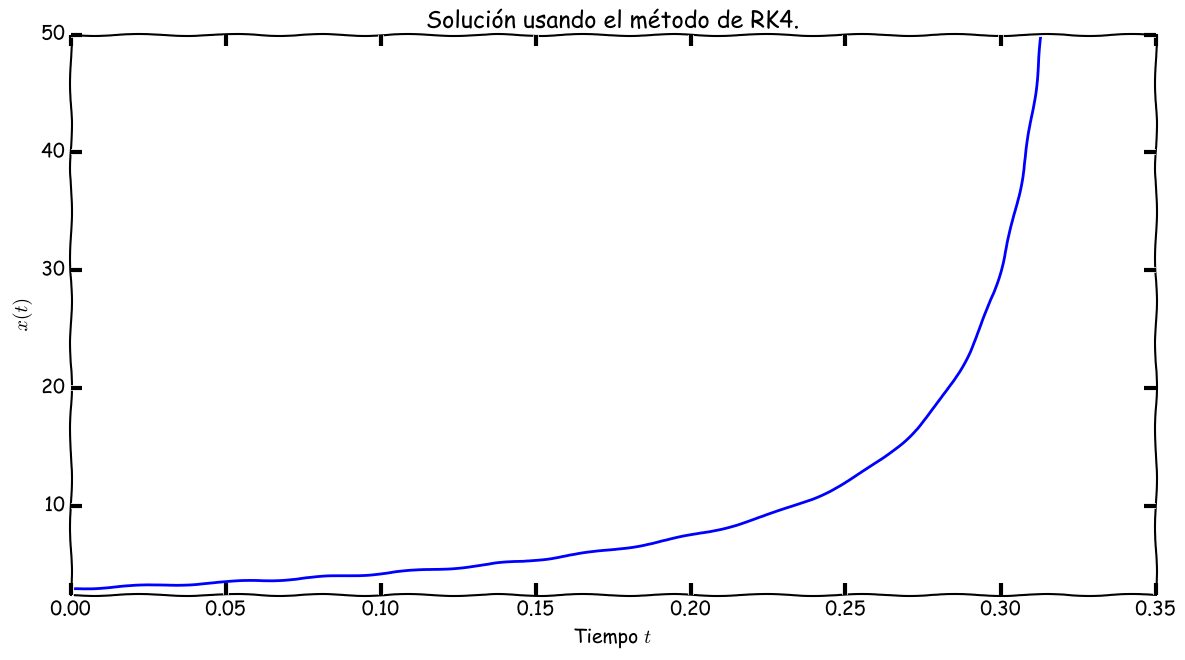

In [18]:
fig3 = figure("runge_kutta_solution", figsize=(14,7))
plt.plot(trk,xrk);
plt.ylabel(L"$x(t)$");
plt.xlabel(L"Tiempo $t$");
plt.title("Solución usando el método de RK4.");

ax = plt.gca()
ax[:set_ylim]((2.5,50));
show()

Las tres soluciones se grafican en una sola gráfica:

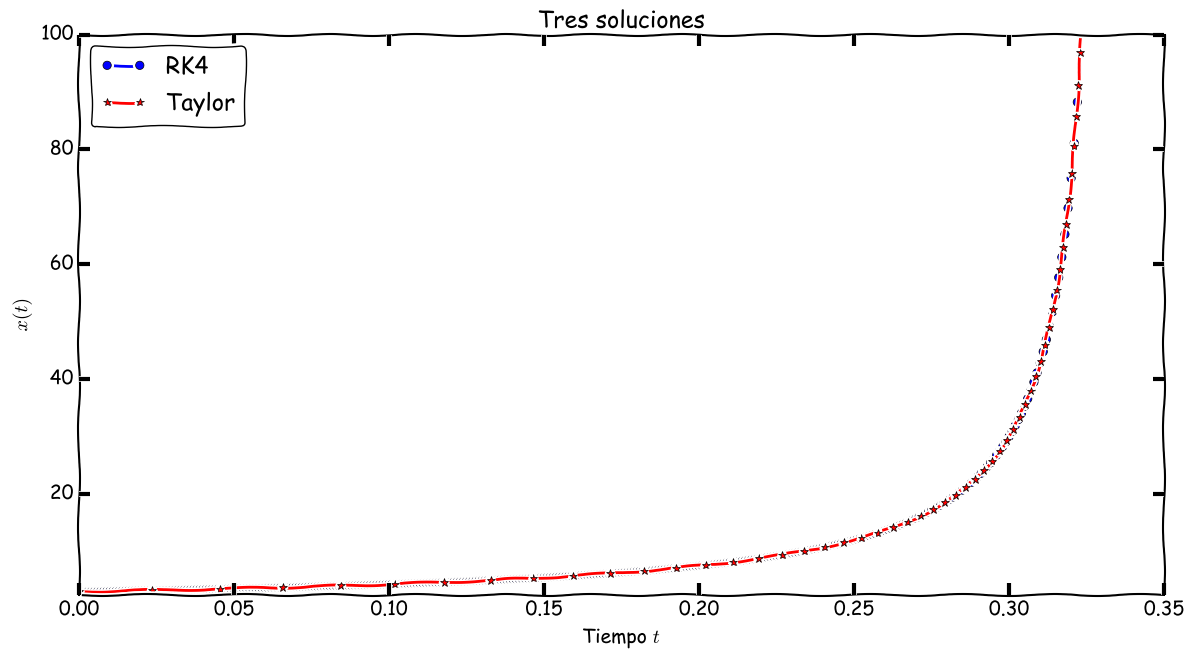

In [21]:
fig4 = figure("solutions", figsize=(14,7))
plt.plot(trk,xrk,"-ob",label="RK4");
plt.plot(t,x,"-*r",label="Taylor");
# Descomente esta línea para ver la solución analítica. Se quitó para
# no encimar demasiado las cosas.
#plt.plot(t,xs,"-g",label="Analytic")
plt.ylabel(L"$x(t)$");
plt.xlabel(L"Tiempo $t$");
plt.title("Tres soluciones");
plt.legend(loc="upper left", fancybox="True");
ax = plt.gca()
ax[:set_ylim]((2.5,100));
show()

Los dos métodos son muy buenos para esta simple ecuación así que lo anterior no nos sirve mucho.

Mejor comparamos los errores de manera logarítimica:

In [22]:
xsrk = similar(xrk)
xerrorrk = similar(xrk)
for i in range(1,length(xrk))
    xsrk[i] = 3/(1-3*trk[i])
    xerrorrk[i] = abs(xrk[i]-xsrk[i])
end

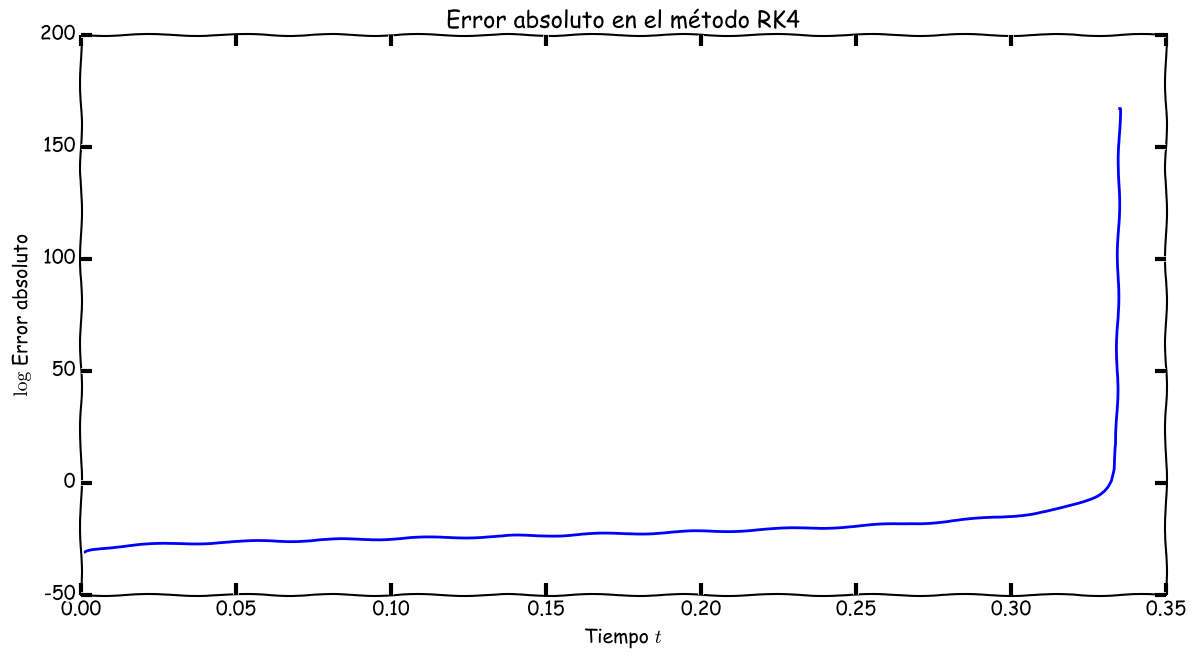

In [23]:
fig5 = figure("error_propag_rk4", figsize=(14,7))
plt.plot(trk,log(xerrorrk));
plt.ylabel(L"$\log$ Error absoluto");
plt.xlabel(L"Tiempo $t$");
plt.title("Error absoluto en el método RK4")
show()

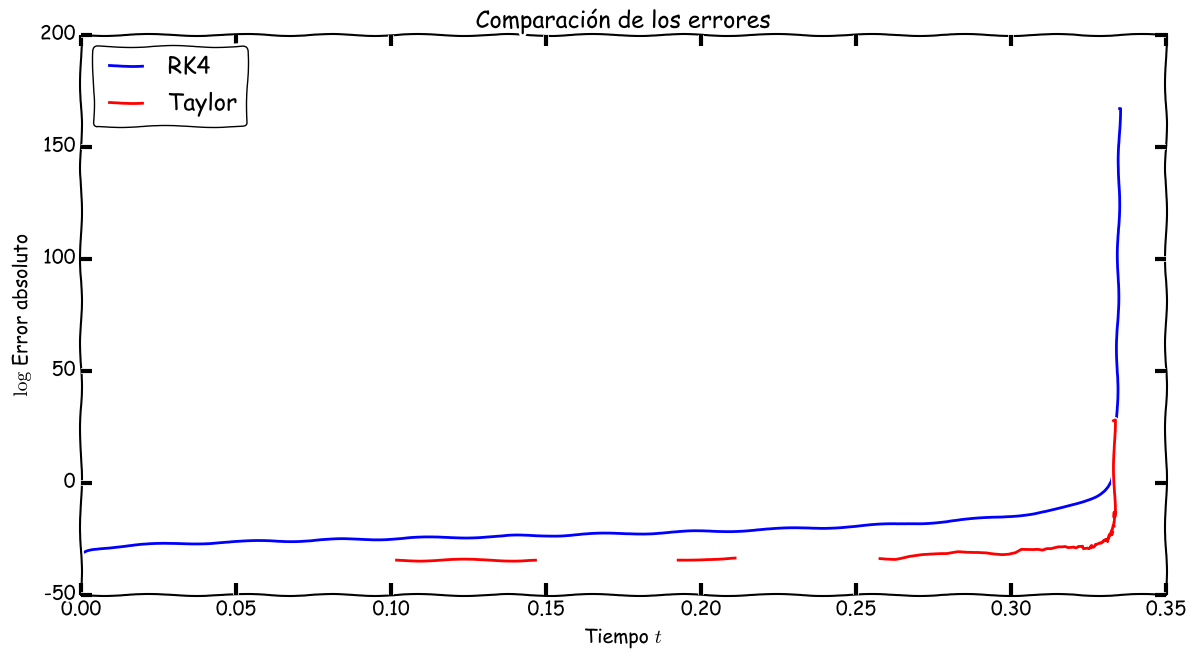

In [24]:
fig6 = figure("error_propag_comp", figsize=(14,7))
plt.plot(trk,log(xerrorrk),"-b",label="RK4");
plt.plot(t,log(xerror),"-r",label="Taylor");
plt.ylabel(L"$\log$ Error absoluto");
plt.xlabel(L"Tiempo $t$");
plt.title("Comparación de los errores");
plt.legend(loc="upper left", fancybox="True");
show()

Como se puede ver, los errores sí son varios órdenes menor con Taylor. Vale la pena aclarar que la curva de Taylor se ve cortada porque al principio los pasos son relativamente grandes, lo que demuestra que un está perdiendo el tiempo en RK4 con pasos tan pequeños al principio. Claro que después son los pasos reducidos de Taylor que hacen que la solución sea mejor.

### Ejercicio

Integra la ecuación de movimiento para el oscilador armónico, $\ddot{x} = -2x$, con $x(0)=2$, $\dot{x}(0)=0$, durante 10^4 periodos de oscilación (o sea, hasta $t_f = 10^4 \cdot 2\pi/\sqrt{2}$, usando el método de Taylor y el método de Runge-Kutta de 4o orden con paso de integración constante. Compara cómo cambia la energía (respecto al valor al tiempo cero) en función del tiempo para ambos métodos.

Queda claro que el sistema de orden dos se separa en dos sistemas de orden uno definiendo:

$$\dot{x}(t) = p(t),\qquad x(0) = 2$$

$$\dot{p}(t) = -2x(t),\qquad p(0) = 0$$

Modificamos ligeramente el integrador para meter los dos sistemas:

In [5]:
function integrador2(t0::Real, x0::Real, v0::Real, tf::Real, f::Function, p::Int)
    # Inicializamos la lista de respuestas.
    t = [t0]
    xt = [x0]
    vt = [v0]
    
    # Ejecutamos mientras que el tiempo inicial sea menor al final.
    while t0 <= tf
        
        # Empezamos un Taylor con la condición inicial, un solo escalar.
        x = Taylor(x0)
        v = Taylor(v0)
        
        # A continuación se calcular la serie de Taylor hasta orden p
        # usando las relaciones de recurrencia entre f y x.
        for i in range(1,p)
            # En cada paso se vuelve a calcular la serie de Taylor de f(x),
            # cada vez a mayor orden.
            ft = f(x)
            # De ésta se extrae el nuevo coeficiente de x(t) que se anexa.
            v = Taylor(push!(v.taylor_vec,ft.taylor_vec[i]/i))
            x = Taylor(push!(x.taylor_vec,v.taylor_vec[i]/i))
        end
    
        # Ahora se escoge un paso. Como se recomienda, se toman los dos 
        # últimos términos de la serie para calcular h1 y h2. Esto se hace
        # tanto para x como para v.
        h1 = (1/2)*(eps(1.0)/abs(x.taylor_vec[p+1]))^(1/p)
        h2 = (1/2)*(eps(1.0)/abs(x.taylor_vec[p]))^(1/(p-1))
        h3 = (1/2)*(eps(1.0)/abs(v.taylor_vec[p+1]))^(1/p)
        h4 = (1/2)*(eps(1.0)/abs(v.taylor_vec[p]))^(1/(p-1))
        # Luego se toma h como el mínimo de las anteriores y se suma
        # al tiempo.
        h = minimum([h1,h2])
        t0 += h
    
        # Ahora sumamos la serie de acuerdo al método de Horner:
        sv = v.taylor_vec[p+1]
        sx = x.taylor_vec[p+1]
        for k in range(1,p)
            sv = v.taylor_vec[p+1-k] + h*sv
            sx = x.taylor_vec[p+1-k] + h*sx
        end
    
        # x0 es ahora la suma de la serie: x(t0+h).
        x0 = sx
        v0 = sv
        
        # Vamos a poner una condición por si la solución diverge.
        if (isnan(x0) | (abs(x0) == Inf)) | (isnan(v0) | (abs(v0) == Inf))
            println("La solución diverge en t = ", t0)
            println("No pude llegar al tiempo final t = ", tf)
            # Que devuelva las listas antes de la divergencia.
            return t, xt, vt
        end
        
    
        # Se anexa a la lista de respuestas.
        push!(t,t0)
        push!(xt,x0)
        push!(vt,v0)
    
    end
    # Se devuelven las lista.
    return t, xt, vt
end

integrador2 (generic function with 1 method)

In [6]:
# Ponemos el orden de las series de Taylor como 10.
p = 10

# Las condiciones del problema son:
t0 = 0.0
tf = (10^4)*(2*pi)/sqrt(2)
x0 = 2.0
v0 = 0.0

# La función p'(t) = f(x(t))
g(x) = -2*x

g (generic function with 1 method)

In [7]:
t,x,v = integrador2(t0,x0,v0,tf,g,p);

([0.0,0.0406417,0.0746305,0.106404,0.136957,0.166673,0.195757,0.224337,0.252501,0.28031  …  44428.6,44428.6,44428.6,44428.7,44428.7,44428.7,44428.8,44428.8,44428.8,44428.9],[2.0,1.9967,1.98887,1.9774,1.9626,1.9447,1.92385,1.90019,1.87384,1.8449  …  1.87394,1.89997,1.92333,1.94391,1.9616,1.97623,1.98764,1.99557,1.99963,1.99878],[0.0,-0.162477,-0.297968,-0.424014,-0.54441,-0.660535,-0.773065,-0.882371,-0.988675,-1.0921  …  0.98829,0.883321,0.775643,0.665142,0.551625,0.434763,0.313974,0.188125,0.0545013,-0.098974])

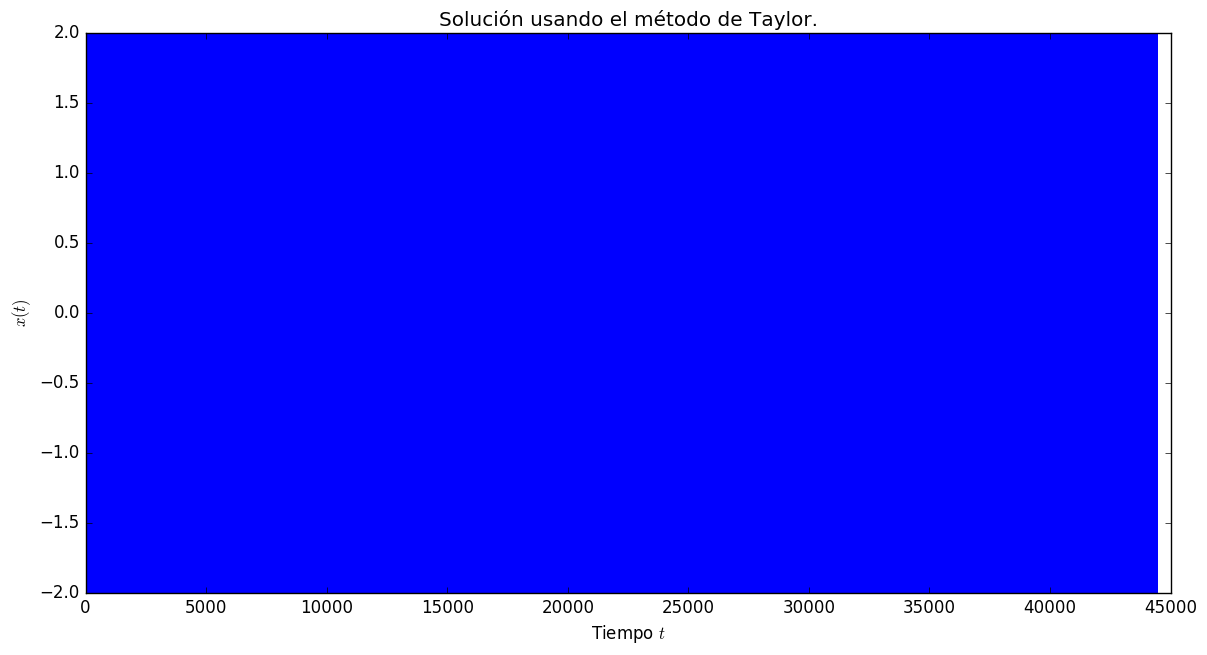

In [11]:
fig7 = figure("taylor_solution", figsize=(14,7))
plt.plot(t,x,"-b",label = "Amplitud x(t)");
plt.ylabel(L"$x(t)$");
plt.xlabel(L"Tiempo $t$");
plt.title("Solución usando el método de Taylor.");
show()